In [1]:
print("This is the testing and experimentation notebook")

This is the testing and experimentation notebook


In [2]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data_path = 'Churn_Modelling.csv'

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [7]:
# Dropping irrelevant columns
# RowNumeber, CustomerId, Surname
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.shape

(10000, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
# Encoding Gender using LabelEncoder

leg = LabelEncoder()

data['Gender'] = leg.fit_transform(data['Gender'])

In [12]:
# Checking the count of each category
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
# Encoding Geography using OHE since its not ordinal like Gender
# ohe = OneHotEncoder(sparse_output=False)
# geo_encoded = ohe.fit_transform(data[['Geography']])
# geo_encoded

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
geo_encoded=ohe.fit_transform(data[['Geography']]).toarray()
geo_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [19]:
ohe.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [20]:
geo_encoded_df = pd.DataFrame(geo_encoded, columns=ohe.get_feature_names_out()).head(10)

In [21]:
# merge the columns

data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis = 1)

In [22]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [23]:
data.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.064050,-0.613578,0.333209
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.250000,-0.272166,-0.089087
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.104521,-0.557226,0.253053
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.045996,0.012519,-0.057367
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.299410,0.152763,0.220076
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.086548,0.741999,-0.393228
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.089087,0.218218,-0.047619
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.166667,-0.408248,0.089087
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.517004,0.250085,0.388981
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.166667,0.408248,-0.089087


In [24]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

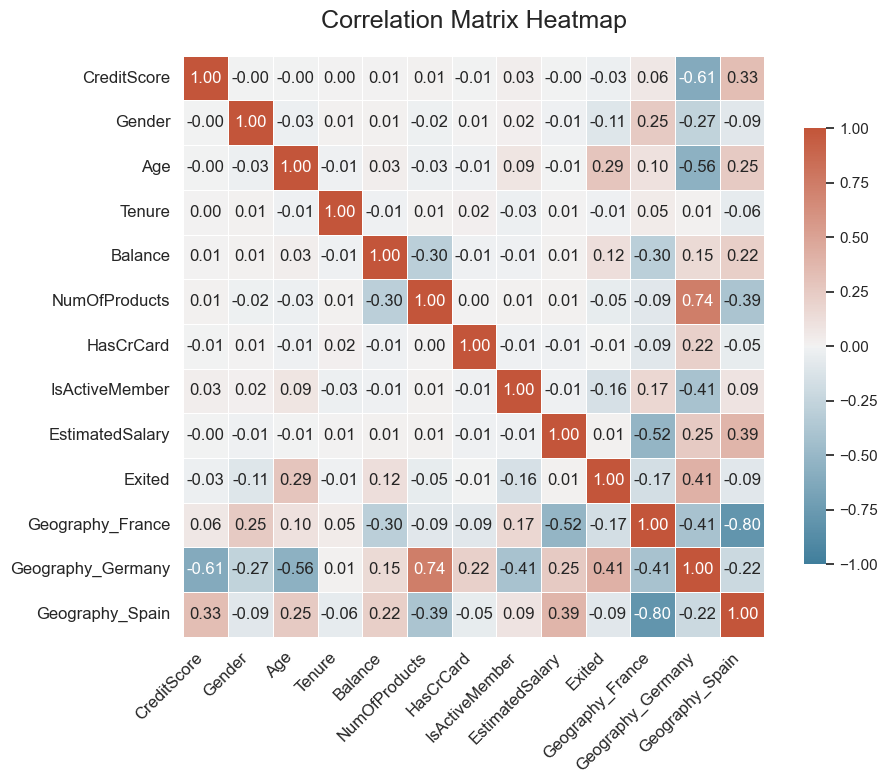

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = data.corr()

# Set up the figure size and style
plt.figure(figsize=(10, 8))
sns.set(style="white")  # White background

# Generate a mask for the upper triangle (optional, to focus on one side)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a custom diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask, correct aspect ratio, and formatting
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", 
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink": .75}, annot_kws={"size": 12})

# Title and labels
plt.title('Correlation Matrix Heatmap', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# Save the encoders for future use using pickel

with open('gender_encoder_le.pkl', 'wb') as file:
    pickle.dump(leg, file)

with open('geography_encoder_ohe.pkl', 'wb') as file:
    pickle.dump(ohe, file)

In [27]:
# Divide features and target

X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [28]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,NaN,NaN,NaN
9996,516,1,35,10,57369.61,1,1,1,101699.77,NaN,NaN,NaN
9997,709,0,36,7,0.00,1,0,1,42085.58,NaN,NaN,NaN
9998,772,1,42,3,75075.31,2,1,0,92888.52,NaN,NaN,NaN


In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [30]:
# Train test split happpening here 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
ssc = StandardScaler()
X_train_transformed = ssc.fit_transform(X_train)
X_test_transformed = ssc.transform(X_test)

In [32]:
# exporting StandardScaler for future use

with open('sscaler.pkl', 'wb') as file:
    pickle.dump(ssc, file)

In [33]:
X_train_transformed

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,         nan,
                nan,         nan],
       [-0.20389777,  0.91324755,  0.29493847, ...,         nan,
                nan,         nan],
       [-0.96147213,  0.91324755, -1.41636539, ...,         nan,
                nan,         nan],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,         nan,
                nan,         nan],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,         nan,
                nan,         nan],
       [ 0.47065475,  0.91324755,  1.15059039, ...,         nan,
                nan,         nan]])

## ANN Implementation

1. Creating a sequential model
2. Adding Dense layers to the network
3. Selecting activation function
4. Selecting Loss function
5. Selecting Optimizer
6. Metrics
7. Visualisation using Tensorboard
8. Training the model and checking accuracy using validation data

In [34]:
# Importing all the important ANN things
import tensorflow as tf

In [35]:
# more libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [36]:
num_cols = X_test_transformed.shape[1]

In [37]:
model = Sequential(
    [
        Dense(64, activation='relu', input_shape=(num_cols,)), # First hidden layer connecting with input layer
        Dense(32, activation='relu'),   # Second Hidden layer
        Dense(1, activation='sigmoid')  # Third Hidden layer
    ],
    name= "my_ann_model"
)

c:\Users\hp\Documents\Python\CustomerChurnProject\env1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "my_ann_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
myopt = tf.keras.optimizers.Adam(learning_rate=0.01)
myloss = tf. keras.losses.BinaryCrossentropy()

In [39]:
model.compile(optimizer=myopt, loss=myloss, metrics=['accuracy'])

In [40]:
import datetime

In [41]:
# setup tensorboard
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir = "logs/fit/"+ datetime.datetime.now().strftime("%Y%m%d - %H%M%S")

tf_callback = TensorBoard(log_dir= log_dir, histogram_freq=1)


In [42]:
# Setup Early Stopping
es_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [43]:
# train the model
history = model.fit(
    X_train_transformed, y_train, validation_data=(X_test_transformed, y_test), epochs=100,
    callbacks = [es_callback, tf_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7873 - loss: 0.5932 - val_accuracy: 0.8035 - val_loss: 0.4984
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7974 - loss: 0.5050 - val_accuracy: 0.8035 - val_loss: 0.4959
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7939 - loss: 0.5089 - val_accuracy: 0.8035 - val_loss: 0.4956
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7997 - loss: 0.5010 - val_accuracy: 0.8035 - val_loss: 0.4958
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7911 - loss: 0.5126 - val_accuracy: 0.8035 - val_loss: 0.4956
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7924 - loss: 0.5110 - val_accuracy: 0.8035 - val_loss: 0.4957
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7931 - loss: 0.5099 - val_accuracy: 0.8035 - val_loss: 0.4955
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7912 - loss: 0.5130 - val_accu

In [44]:
model.save('model.h5')
# model.save('model.keras')

In [45]:
%load_ext tensorboard

In [38]:
%tensorboard --logdir logs/fit/

Reusing TensorBoard on port 6006 (pid 4064), started 1 day, 3:04:23 ago. (Use '!kill 4064' to kill it.)

In [43]:
# from keras.models import load_model
# import pickle

In [46]:
# # Load pickel files

# model = load_model('model.h5')

# with open('gender_encoder_le.pkl', 'rb') as file:
#     gender_encoder = pickle.load(file)

# with open('geography_encoder_ohe.pkl', 'rb') as file:
#     geography_encoder = pickle.load(file)
    
# with open('sscaler.pkl', 'rb') as file:
#     ssc = pickle.load(file)

